In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('/content/Speed Dating Data.csv',sep=';',encoding='latin1')

df = data[[
           # sobre el experimento
           'iid','pid', 'round', 'order',
           
           # target
           'match',
           
           # datos: antes del experimento
           'field_cd', 'gender', 'race', 'race_o', 'samerace', 'from', 'age', 'age_o', 'income', 'date', 'go_out', 'career_c', 'met',
           
           # predisposición y expectativas: antes del experimento
            'goal','exphappy', 'expnum',
           
           # preferencias: antes del experimento
           'int_corr', 'imprace', 'imprelig',    
           'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha',
           'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
           'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1',
           'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',
           'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga'
           ]].copy()

n_registros_orig = len(df)

Para poder tener los datos del *partner* tengo que crear un dataframe con todos los *iid*s y cruzarlos con sus intereses.

In [3]:
info_partner = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',
           'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga','date','exphappy','goal']

datos_personales = df[['iid']+info_partner].drop_duplicates(subset=['iid'])

# hay 9 iids que no tienen registrados sus intereses (cuando un interes es nulo, toda la fila es nula)
datos_personales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 0 to 8356
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   iid       551 non-null    int64  
 1   sports    542 non-null    float64
 2   tvsports  542 non-null    float64
 3   exercise  542 non-null    float64
 4   dining    542 non-null    float64
 5   museums   542 non-null    float64
 6   art       542 non-null    float64
 7   hiking    542 non-null    float64
 8   gaming    542 non-null    float64
 9   clubbing  542 non-null    float64
 10  reading   542 non-null    float64
 11  tv        542 non-null    float64
 12  theater   542 non-null    float64
 13  movies    542 non-null    float64
 14  concerts  542 non-null    float64
 15  music     542 non-null    float64
 16  shopping  542 non-null    float64
 17  yoga      542 non-null    float64
 18  date      543 non-null    float64
 19  exphappy  541 non-null    float64
 20  goal      544 non-null    float

In [4]:
# estos son los iids que no tienen intereses
datos_personales[datos_personales['sports'].isnull()]['iid']

312      28
828      58
838      59
1866    136
4648    308
5004    339
5014    340
5114    346
6906    468
Name: iid, dtype: int64

In [5]:
df = df.merge(datos_personales,how='left', on = 'iid')

In [6]:
porc_null = df.isnull().sum()
porc_null = pd.DataFrame(porc_null,columns=['cant_null'])
porc_null['porc'] = (porc_null['cant_null']/len(df))*100

In [7]:
#elimino las columnas que tienen mas del 40% nulo
cols = porc_null[porc_null['porc']>40].index
df = df.drop(columns = cols,axis=1)

In [8]:
#cuantas columnas tienen menos de 40% nulo
len(porc_null[porc_null['porc']<40].index)

76

# Missings

In [9]:
cols_100 = ['pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha',
           'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']

df[cols_100] = df[cols_100].fillna(0)

In [10]:
cols_droprows = ['race','race_o','goal_x','go_out','imprelig','imprace','field_cd','career_c','yoga_x',
                 'museums_x','dining_x','exercise_x','tvsports_x','sports_x','gaming_x','clubbing_x','reading_x',
                 'tv_x','theater_x','movies_x','shopping_x','concerts_x','music_x','art_x','hiking_x','exphappy_x',
                 'amb3_1','fun3_1','intel3_1','sinc3_1','attr3_1','int_corr','met', 'age', 'age_o','date_x']
df = df.dropna(subset = cols_droprows)

# borro las filas que no tienen registrados los intereses del partner
df = df.dropna(subset = ['sports_y','date_y','exphappy_y','goal_y'])

In [11]:
# cantidad de filas eliminadas
n_registros_orig - len(df)

705

In [12]:
(1 - (len(df)/n_registros_orig))*100

8.414896156600616

# Tipos de dato

Para las visualizaciones y comprension de los datos primero se decodifican algunas de las variables...

In [13]:
dict = {1 : 'Lawyer', 2 : 'Academic/Research', 3 : 'Psychologist', 4 : 'Doctor/Medicine', 5 : 'Engineer', 6 : 'Creative Arts/Entertainment', 
        7 : 'Admin',  8 : 'Real Estate',  9 : 'International/Humanitarian Affairs', 10 : 'Undecided', 11 : 'Social Work', 12 : 'Speech Pathology',
         13 : 'Politics', 14 : 'Pro sports/Athletics', 15 : 'Other', 16 : 'Journalism', 17 : 'Architecture'}

df['career'] = df['career_c'].map(dict)

dict = {1 : 'Law', 2 : 'Math', 3 : 'Psychologist', 4 : 'Pharmaceuticals & Bio Tech', 5 : 'Engineering', 6 : 'English/Creative Writing/ Journalism', 
        7 : 'History/Religion/Philosophy',  8 : 'Business/Econ/Finance',  9 : 'Education, Academia', 10 : 'Biological Sciences/Chemistry/Physics', 11 : 'Social Work', 12 : 'Undergrad/undecided',
         13 : 'Political Science/International Affairs', 14 : 'Film', 15 : 'Fine Arts/Arts Administration', 16 : 'Languages', 17 : 'Architecture', 18 : 'Other'}

df['field'] = df['field_cd'].map(dict)

dict = {1 : 'African American', 2 : 'European', 3 : 'Latino', 4 : 'Asian', 5 : 'Native American', 6 : 'Other'}

df['race_txt'] = df['race'].map(dict)
df['race_o_txt'] = df['race_o'].map(dict)

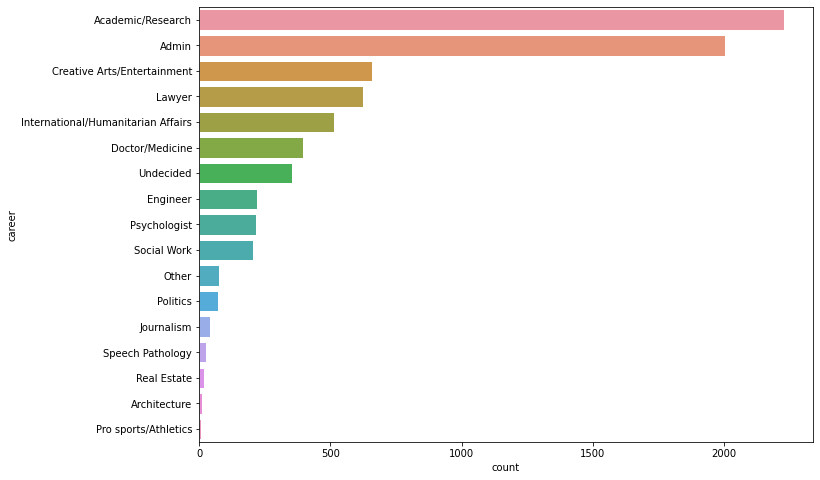

In [14]:
fig, ax = plt.subplots(figsize=(11,8))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="career", data=df, order = df['career'].value_counts().index)

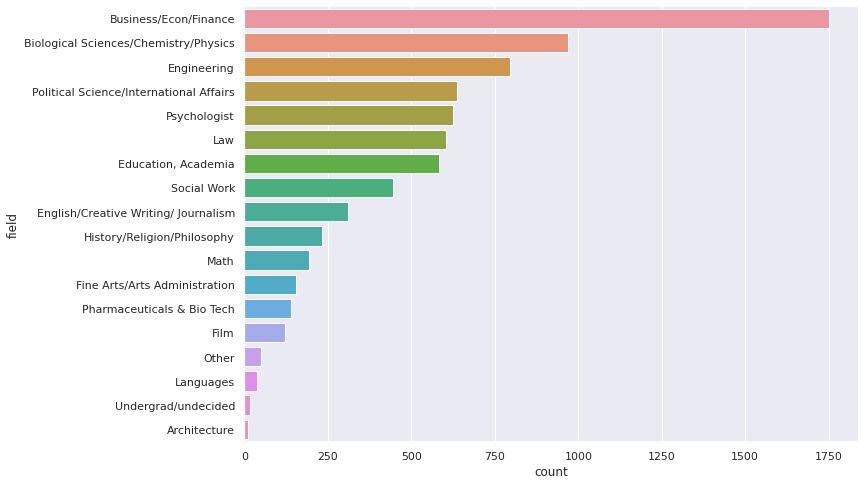

In [15]:
fig, ax = plt.subplots(figsize=(11,8))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="field", data=df, order = df['field'].value_counts().index)

In [16]:
intereses_x = ['sports_x','tvsports_x','exercise_x','dining_x','museums_x',
               'art_x','hiking_x','gaming_x','clubbing_x','reading_x','tv_x',
               'theater_x','movies_x','concerts_x','music_x','shopping_x','yoga_x']

intereses_y = ['sports_y','tvsports_y','exercise_y','dining_y','museums_y',
               'art_y','hiking_y','gaming_y','clubbing_y','reading_y','tv_y',
               'theater_y','movies_y','concerts_y','music_y','shopping_y','yoga_y']

In [17]:
int_cols = ['pid','field_cd','race','race_o','age','age_o','date_x','date_y','go_out',
            'career_c','met','goal_x','goal_y','exphappy_x','exphappy_y','imprace','imprelig'] + intereses_x + intereses_y

for col in int_cols:
  df[col] = df[col].astype('int16')

In [18]:
df_corr = df.corr('pearson')
df_corr.style.background_gradient(cmap='coolwarm', axis=None)

## iids con valores unicos

El código a continuación verifica que las caracteristicas de cada participante (identificado por su iid) sean iguales en cada encuentro.

In [19]:
def multiples_por_id(df,lista_cols):
  dic = {}
  for col in lista_cols:
    iid_unique = df.groupby('iid')[[col]].nunique()

    # busco los iids ascociados a mas de un valor (en las cols que no deberia ser asi)
    iids = list(iid_unique[iid_unique[col] > 1].index)
    if len(iids) > 0:
      dic[col] = iids
  return dic

In [20]:
multiples_por_id(df,['gender','imprace','imprelig','attr1_1','sinc1_1',
                     'intel1_1','fun1_1','amb1_1','shar1_1','attr3_1',
                     'sinc3_1','intel3_1','fun3_1','amb3_1','field','career'])

{}

## Outliers

Primero chequeo que los intereses estén todos en el rango de 1 a 10. Esto se cumple para todos los iids, por lo que los intereses de los sujetos (como los de los partners) no tienen outliers.

In [21]:
df[intereses_x].describe()

,sports_x,tvsports_x,exercise_x,dining_x,museums_x,art_x,hiking_x,gaming_x,clubbing_x,reading_x,tv_x,theater_x,movies_x,concerts_x,music_x,shopping_x,yoga_x
count,7673.000000,7673.000000,7673.000000,7673.000000,7673.000000,7673.000000,7673.000000,7673.000000,7673.000000,7673.000000,7673.000000,7673.000000,7673.000000,7673.000000,7673.000000,7673.000000,7673.000000
mean,6.449498,4.570572,6.269126,7.784309,7.024501,6.747687,5.740779,3.880229,5.725922,7.687345,5.279552,6.803858,7.936009,6.820931,7.838655,5.649420,4.374560
std,2.602755,2.793745,2.411285,1.766994,2.024015,2.239258,2.586497,2.631300,2.494483,2.015029,2.536320,2.205069,1.664885,2.152004,1.767445,2.612309,2.705465
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,2.000000,5.000000,7.000000,6.000000,5.000000,4.000000,2.000000,4.000000,7.000000,3.000000,5.000000,7.000000,5.000000,7.000000,4.000000,2.000000
50%,7.000000,4.000000,6.000000,8.000000,7.000000,7.000000,6.000000,3.000000,6.000000,8.000000,6.000000,7.000000,8.000000,7.000000,8.000000,6.000000,4.000000
75%,9.000000,7.000000,8.000000,9.000000,9.000000,8.000000,8.000000,6.000000,8.000000,9.000000,7.000000,9.000000,9.000000,8.000000,9.000000,8.000000,7.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,14.000000,10.000000,13.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [22]:
# borro las filas en donde no se respeta el maximo
df.drop(df[(df['gaming_x'] > 10) | (df['gaming_x'] < 1) | (df['hiking_x'] > 10) | (df['reading_x'] > 10)| (df['hiking_x'] < 1)].index, inplace = True)
df.drop(df[(df['gaming_y'] > 10) | (df['gaming_y'] < 1) | (df['hiking_y'] > 10) | (df['reading_y'] > 10)| (df['hiking_y'] < 1)].index, inplace = True)

In [24]:
pf_x = ['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']
autoperc = ['attr3_1','sinc3_1','intel3_1','fun3_1','amb3_1']
pf_y = ['pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha']

In [ ]:
i_col = 0

fig, axs = plt.subplots(2, 3, figsize=(25, 10))
for i in range(2):
  for j in range(3):
    sns.boxplot(x=df[pf_x[i_col]], ax=axs[i, j])
    i_col+=1

plt.show()

In [ ]:
i_col = 0

fig, axs = plt.subplots(2, 3, figsize=(25, 10))
for i in range(2):
  for j in range(3):
    if i_col <= len(autoperc)-1:
      sns.boxplot(x=df[autoperc[i_col]], ax=axs[i, j])
      i_col+=1

plt.show()

In [ ]:
i_col = 0

fig, axs = plt.subplots(2, 3, figsize=(25, 10))
for i in range(2):
  for j in range(3):
    if i_col <= len(pf_y)-1:
      sns.boxplot(x=df[pf_y[i_col]], ax=axs[i, j])
      i_col+=1

plt.show()

A partir de los boxplots se ve que todos los rangos de las variables se respetan. Sin embargo, hay que revisar que se cumpla que la suma de ciertas columnas de 100.

In [26]:
# corrijo las columnas de pf_x y pf_y
sumar_pf_x = (100 - df[pf_x].sum(axis=1))/len(pf_x)
sumar_pf_y = (100 - df[pf_y].sum(axis=1))/len(pf_x)

for col in pf_x:
  df[col] = df[col] + sumar_pf_x

for col in pf_y:
  df[col] = df[col] + sumar_pf_y

In [27]:
s = (100 - df[pf_x].sum(axis=1))/len(pf_x)
s[s!=0]

170     2.368476e-15
171     2.368476e-15
172     2.368476e-15
173     2.368476e-15
174     2.368476e-15
            ...     
7799    2.368476e-15
7801    2.368476e-15
7802    2.368476e-15
7803    2.368476e-15
7804    2.368476e-15
Length: 352, dtype: float64

Ahora el resto de las columnas...

In [28]:
def datosOutliers(df,columna):
  aux = df[df[columna].notnull()]
  q1 = np.percentile(aux[columna], 25,interpolation = 'midpoint')
  q3 = np.percentile(aux[columna], 75,interpolation = 'midpoint')
  iqr = q3 - q1
  return [q1,q3,iqr]

In [29]:
def eliminarOutliers(df,columna):
  datos = datosOutliers(df,columna)

  q1 = datos[0]
  q3 = datos[1]
  iqr = datos[2]

  upper = q3+1.5*iqr
  lower = q1-1.5*iqr

  df.drop(df[(df[columna]<lower) | (df[columna]>upper)].index, inplace = True)

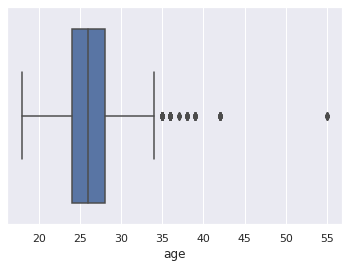

In [30]:
ax = sns.boxplot(x=df['age'])

In [31]:
eliminarOutliers(df,'age')
eliminarOutliers(df,'age_o')

## Variables

### Intereses

In [ ]:
df_corr = df[intereses_x + ['match']].corr('pearson')
df_corr.style.background_gradient(cmap='coolwarm', axis=None)

A partir de lo anterior ordeno los intereses con mayor correlación con *match*:
1.   clubbing
2.   yoga
3.   art
4.   dining
5.   concerts

Estos intereses parecen impactar en la probabilidad de una persona de hacer match. De esta manera, aquellos que se interesan mas en *clubbing* tienen mas chances de hacer match que quienes se interesan por *concerts*.

Igualmente, considero que es fundamental tener una medida de la compatibilidad existente entre 2 personas. Por esto se hacen variables de compatibilidad para cada uno de estos 5 intereses.

In [33]:
#df['comp_clubbing'] = df['clubbing_x']*df['clubbing_y']
#df['comp_yoga'] = df['yoga_x']*df['yoga_y']
#df['comp_art'] = df['art_x']*df['art_y']
#df['comp_dining'] = df['dining_x']*df['dining_y']

compatibilidades = []

for i in range(len(intereses_x)):
  interes = intereses_x[i][:len(intereses_x[i])-2]
  nombre_col = 'comp_'+interes
  compatibilidades.append(nombre_col)
  df[nombre_col] = df[intereses_x[i]]*df[intereses_y[i]]

In [ ]:
df_corr = df[['match']+compatibilidades].corr('pearson')
df_corr.style.background_gradient(cmap='coolwarm', axis=None)

In [35]:
df.groupby('comp_clubbing')['match'].mean()

comp_clubbing
1      0.158631
4      0.130719
9      0.146623
16     0.120438
25     0.155019
36     0.169371
49     0.156357
64     0.190902
81     0.216418
100    0.357895
Name: match, dtype: float64

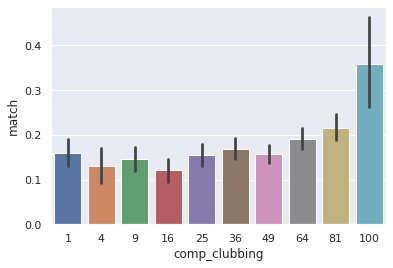

In [36]:
ax = sns.barplot(x='comp_clubbing', y="match", data=df)

### preferencias y autopercepción

In [ ]:
# fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# sns.histplot(data=df, x="attr1_1", kde=True, color="skyblue", ax=axs[0, 0],binwidth = 5)
# sns.histplot(data=df, x="sinc1_1", kde=True, color="olive", ax=axs[0, 1],binwidth = 5)
# sns.histplot(data=df, x="intel1_1", kde=True, color="gold", ax=axs[0, 2],binwidth = 5)
# sns.histplot(data=df, x="fun1_1", kde=True, color="teal", ax=axs[1, 0],binwidth = 5)
# sns.histplot(data=df, x="amb1_1", kde=True, color="teal", ax=axs[1, 1],binwidth = 5)
# sns.histplot(data=df, x="shar1_1", kde=True, color="teal", ax=axs[1, 2],binwidth = 5)

# plt.ylim=(0, 40000)
# plt.xlim=(0, 100)

# plt.show()

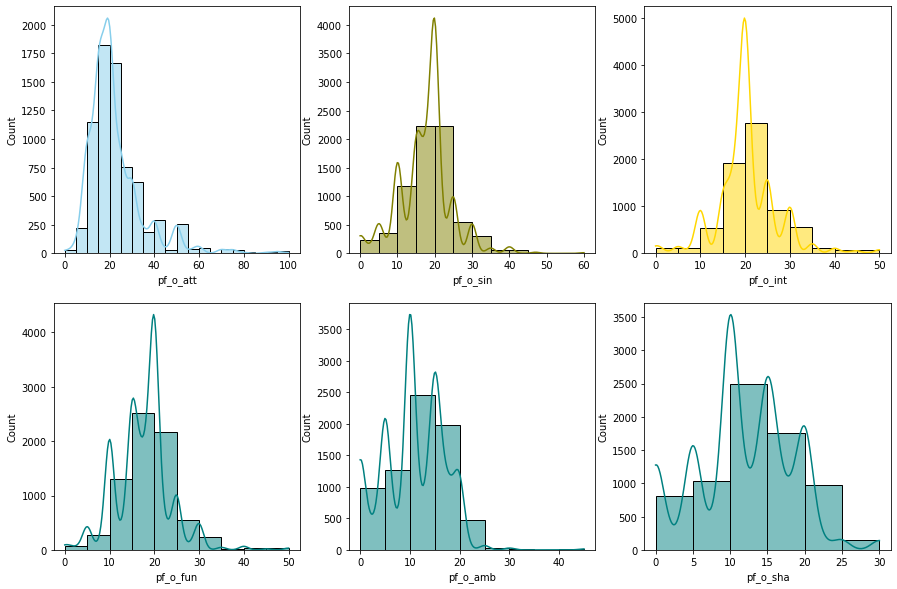

In [51]:
# notar que es indistinto hacer estos graficos con las variables de *1_1 porque simplemente se invierte el orden de los sujetos

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

sns.histplot(data=df, x="pf_o_att", kde=True, color="skyblue", ax=axs[0, 0],binwidth = 5)
sns.histplot(data=df, x="pf_o_sin", kde=True, color="olive", ax=axs[0, 1],binwidth = 5)
sns.histplot(data=df, x="pf_o_int", kde=True, color="gold", ax=axs[0, 2],binwidth = 5)
sns.histplot(data=df, x="pf_o_fun", kde=True, color="teal", ax=axs[1, 0],binwidth = 5)
sns.histplot(data=df, x="pf_o_amb", kde=True, color="teal", ax=axs[1, 1],binwidth = 5)
sns.histplot(data=df, x="pf_o_sha", kde=True, color="teal", ax=axs[1, 2],binwidth = 5)

plt.ylim=(0, 40000)
plt.xlim=(0, 100)

plt.show()

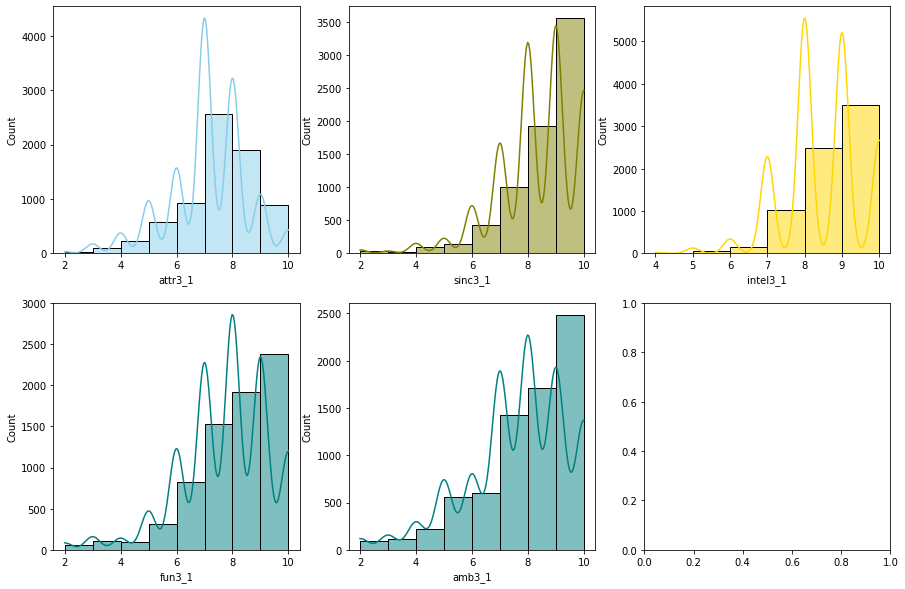

In [52]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

sns.histplot(data=df, x="attr3_1", kde=True, color="skyblue", ax=axs[0, 0],binwidth = 1)
sns.histplot(data=df, x="sinc3_1", kde=True, color="olive", ax=axs[0, 1],binwidth = 1)
sns.histplot(data=df, x="intel3_1", kde=True, color="gold", ax=axs[0, 2],binwidth = 1)
sns.histplot(data=df, x="fun3_1", kde=True, color="teal", ax=axs[1, 0],binwidth = 1)
sns.histplot(data=df, x="amb3_1", kde=True, color="teal", ax=axs[1, 1],binwidth = 1)

plt.ylim=(0, 40000)
plt.xlim=(0, 100)

plt.show()

In [37]:
df['attr'] = df['pf_o_att']/100*df['attr3_1']
df['sin'] = df['pf_o_sin']/100*df['sinc3_1']
df['int'] = df['pf_o_int']/100*df['intel3_1']
df['fun'] = df['pf_o_fun']/100*df['fun3_1']
df['amb'] = df['pf_o_amb']/100*df['amb3_1'] 

# hago una lista de los indicez de compatibilidad de preferencias
comp_pref = ['attr', 'sin', 'int', 'fun', 'amb']

### datos de los sujetos

#### edad

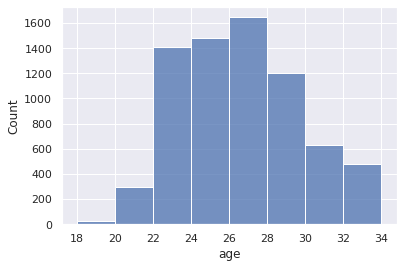

In [38]:
sns.histplot(data=df, x="age", binwidth = 2)

In [39]:
df['dif_age'] = abs(df['age'] - df['age_o'])

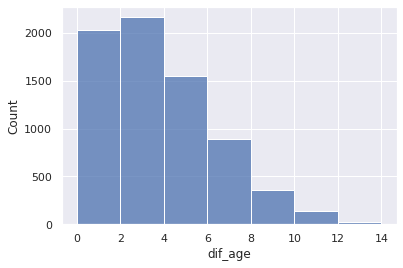

In [40]:
sns.histplot(data=df, x="dif_age", binwidth = 2)

In [41]:
df['dif_age_group'] = np.where(df['dif_age']<6, 1,0)

In [42]:
df.groupby('dif_age_group')['match'].mean().sort_values(ascending=False) 

dif_age_group
1    0.180981
0    0.119803
Name: match, dtype: float64

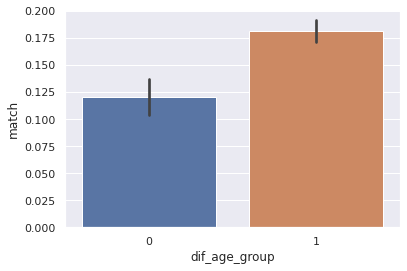

In [43]:
sns.barplot(x="dif_age_group", y="match", data=df)

Ahora me pregunto si será mas determinante la diferencia de edad dependiendo del género... Importa que la mujer sea mas jóven que el hombre, por ejemplo?

In [44]:
# la variable de género marca Female=0 y Male=1
df['dif_age_gen'] = np.where(df['gender']==0,df['age']-df['age_o'],df['age_o']-df['age'])
 
df['dif_age_gen_group'] = np.where((df['dif_age_gen']>=-8) & (df['dif_age_gen']<-5), "-8 a -5",
                                   np.where((df['dif_age_gen']>=-5) & (df['dif_age_gen']<0), "-5 a 0",
                                   np.where((df['dif_age_gen']>=0) & (df['dif_age_gen']<5), "0 a 5",
                                            np.where((df['dif_age_gen']>=5) & (df['dif_age_gen']<8),"5 a 8","extremos"))))

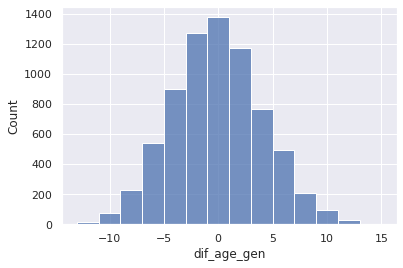

In [45]:
sns.histplot(data=df, x="dif_age_gen", binwidth = 2)

In [46]:
df.groupby('dif_age_gen_group')['match'].mean().sort_values(ascending=False)

dif_age_gen_group
0 a 5       0.187988
-5 a 0      0.182692
-8 a -5     0.125731
5 a 8       0.123613
extremos    0.086842
Name: match, dtype: float64

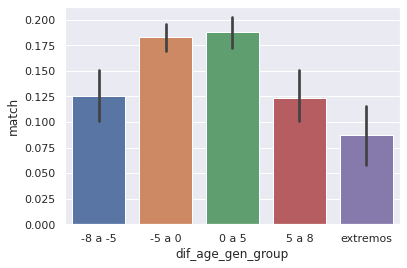

In [47]:
sns.barplot(x="dif_age_gen_group", y="match", data=df, order= ['-8 a -5','-5 a 0','0 a 5','5 a 8','extremos'])

#### **raza**

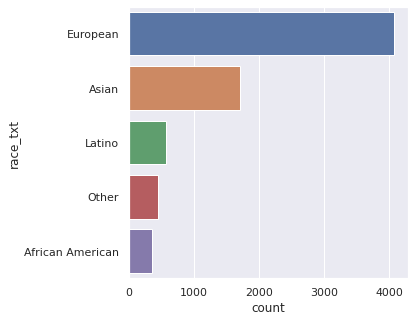

In [48]:
fig, ax = plt.subplots(figsize=(5,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="race_txt", data=df, order = df['race_txt'].value_counts().index)

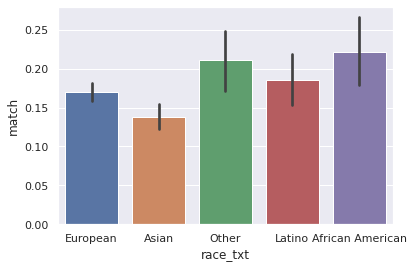

In [49]:
sns.barplot(x="race_txt", y="match", data=df)

In [50]:
df['comb_race_txt'] = df['race_txt']+' - '+df['race_o_txt']

comb_race_mas_match = list(df.groupby('comb_race_txt')['match'].mean().sort_values(ascending = False).index)[:5]
df['comb_race_mejor'] = np.where(df['comb_race_txt'].isin(comb_race_mas_match),1,0)

In [51]:
df.groupby('comb_race_txt')['match'].mean().sort_values(ascending=False)

comb_race_txt
African American - African American    0.588235
African American - Other               0.470588
Other - African American               0.444444
Other - Latino                         0.380952
Latino - Other                         0.341463
Latino - Latino                        0.279070
African American - Latino              0.218750
Other - European                       0.200000
Latino - African American              0.200000
African American - Asian               0.200000
European - Other                       0.197581
European - Latino                      0.192073
Asian - African American               0.187500
Asian - Other                          0.184874
Latino - European                      0.182109
Other - Asian                          0.179487
African American - European            0.179104
European - European                    0.177759
European - African American            0.173913
European - Asian                       0.136972
Asian - European          

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 <a list of 10 Text major ticklabel objects>)

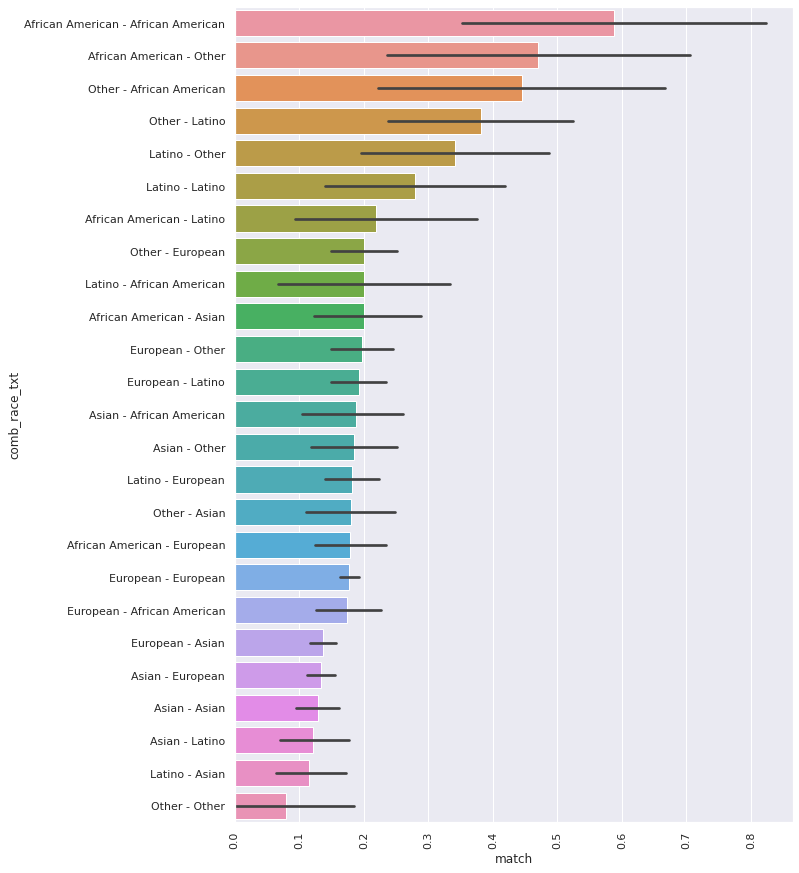

In [52]:
fig, ax = plt.subplots(figsize=(10,15))
sns.barplot(y="comb_race_txt", x="match", data=df, order = df.groupby('comb_race_txt')['match'].mean().sort_values(ascending = False).index)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

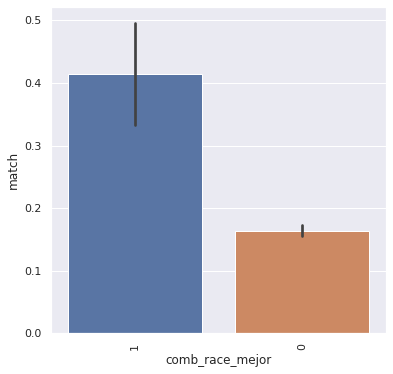

In [53]:
fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(x="comb_race_mejor", y="match", data=df, order = df.groupby('comb_race_mejor')['match'].mean().sort_values(ascending = False).index)
plt.xticks(rotation=90)

In [54]:
df.groupby('comb_race_mejor')['match'].mean()

comb_race_mejor
0    0.164156
1    0.414815
Name: match, dtype: float64

#### **date** - ¿con cuánta frecuencia tenés citas?

In [55]:
df.groupby('date_x')['match'].mean()

date_x
1    0.273973
2    0.221053
3    0.211063
4    0.180274
5    0.156394
6    0.144194
7    0.159359
Name: match, dtype: float64

In [56]:
df['date_x_freq_cd'] = np.where(((df['date_x'] == 1) | (df['date_x'] == 2) | (df['date_x'] == 3)),3,np.where(((df['date_x'] == 4) | (df['date_x'] == 5)),2,1))
df['date_y_freq_cd'] = np.where(((df['date_y'] == 1) | (df['date_y'] == 2) | (df['date_y'] == 3)),3,np.where(((df['date_y'] == 4) | (df['date_y'] == 5)),2,1))
 
dict = {1 : 'Semanalmente', 2 : 'Mensualmente', 3 : 'Casi nunca'}
df['date_x_freq'] = df['date_x_freq_cd'].map(dict)
df['date_y_freq'] = df['date_y_freq_cd'].map(dict)

df['comp_date'] = df['date_x_freq_cd']*df['date_y_freq_cd']

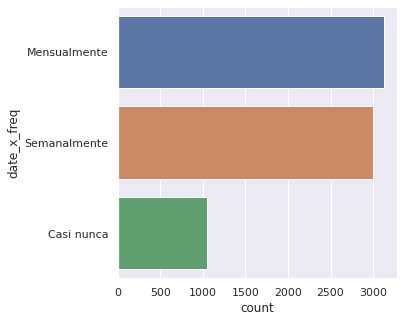

In [57]:
fig, ax = plt.subplots(figsize=(5,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="date_x_freq", data=df, order = df['date_x_freq'].value_counts().index)

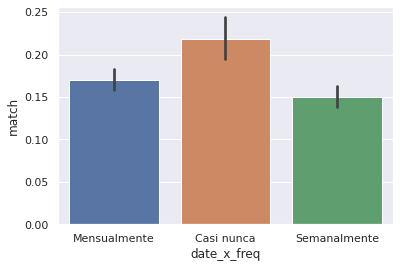

In [58]:
ax = sns.barplot(x="date_x_freq", y="match", data=df)

In [59]:
df.groupby('comp_date')['match'].mean()

comp_date
1    0.150183
4    0.170349
9    0.218182
Name: match, dtype: float64

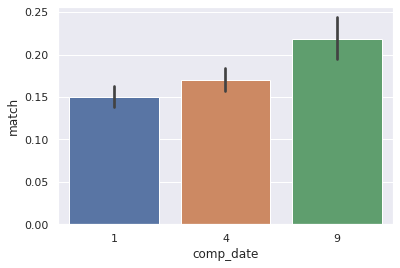

In [60]:
ax = sns.barplot(x="comp_date", y="match", data=df)

Si bien parece haber diferencia sobre la probabilidad de tener un match de personas que no salen nunca a aquellas que si, se construye una nueva variable que puede clasificar mejor.

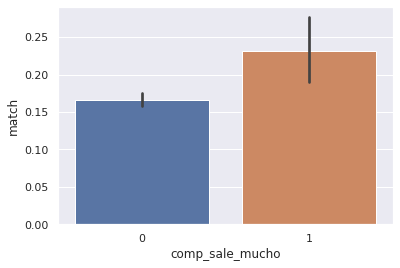

In [61]:
df['sale_mucho_x'] = np.where(((df['date_x'] == 1) | (df['date_x'] == 2)),1,0)
df['sale_mucho_y'] = np.where(((df['date_y'] == 1) | (df['date_y'] == 2)),1,0)

df['comp_sale_mucho'] = df['sale_mucho_x']*df['sale_mucho_y']

ax = sns.barplot(x="comp_sale_mucho", y="match", data=df)

In [62]:
df.groupby('comp_sale_mucho')['match'].mean()

comp_sale_mucho
0    0.165566
1    0.231844
Name: match, dtype: float64

#### **go_out** - ¿con cuánta frecuencia tenés salidas (no necesariamente citas)?

In [63]:
df['go_out_freq_cd'] = np.where(((df['go_out'] == 1) | (df['go_out'] == 2) | (df['go_out'] == 3)),3,np.where(((df['go_out'] == 4) | (df['go_out'] == 5)),2,1))

dict = {1 : 'Semanalmente', 2 : 'Mensualmente', 3 : 'Casi nunca'}
df['go_out_freq'] = df['go_out_freq_cd'].map(dict)

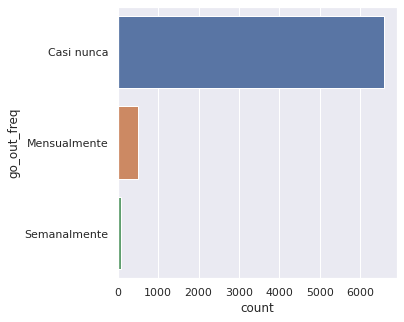

In [64]:
fig, ax = plt.subplots(figsize=(5,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="go_out_freq", data=df, order = df['go_out_freq'].value_counts().index)

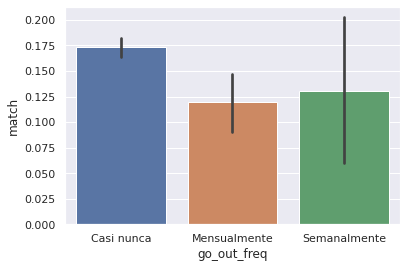

In [65]:
ax = sns.barplot(x="go_out_freq", y="match", data=df)

#### **met**

In [120]:
df[['met']]

,met
30,2
31,1
32,2
33,1
34,2
...,...
8373,0
8374,0
8375,0
8376,0


### predisposición de los sujetos

Es lógico asumir que la predisposición y las expectativas que tienen los sujetos para ir al evento de *Speed Dating* influirá en sus probabilidades de hacer match. Esto comprende desde cual es su objetivo al ir al evento, hasta cuan felices esperan volver del mismo.

#### **goal** - ¿cual es el objetivo de venir a este experimento?

In [66]:
dict = {1 : 'Sonó como una salida divertida', 2 : 'Conocer gente nueva', 3 : 'Conseguir una cita', 4: 'Buscando una relación',
        5: 'Para decir que lo hice',6: 'Otro'}
df['goal_txt'] = df['goal_x'].map(dict)

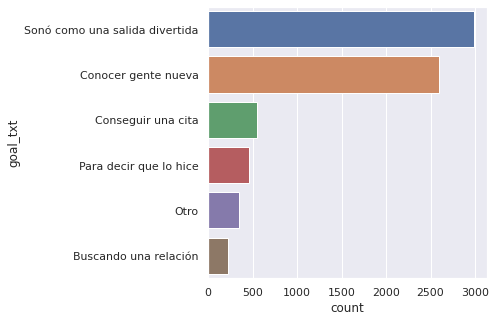

In [67]:
fig, ax = plt.subplots(figsize=(5,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="goal_txt", data=df, order = df['goal_txt'].value_counts().index)

In [68]:
df.groupby('goal_txt')['match'].mean().sort_values(ascending = False)

goal_txt
Buscando una relación             0.209091
Sonó como una salida divertida    0.174816
Para decir que lo hice            0.167742
Conocer gente nueva               0.165000
Conseguir una cita                0.164234
Otro                              0.130682
Name: match, dtype: float64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

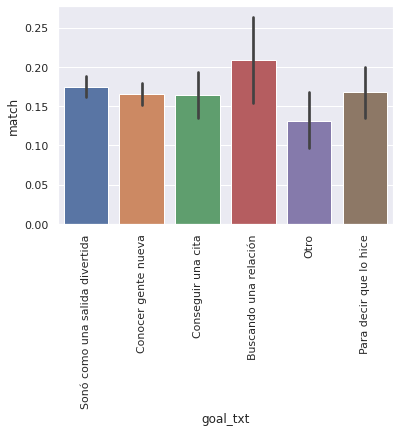

In [69]:
ax = sns.barplot(x="goal_txt", y="match", data=df)
plt.xticks(rotation=90)

Como se ve en los resultados de la tabla anterior, no parece existir mucha capacidad predictiva de un match en cuanto a las intenciones previas del sujeto.

#### **exphappy** - ¿cuan feliz espera estar con la gente que conoce?

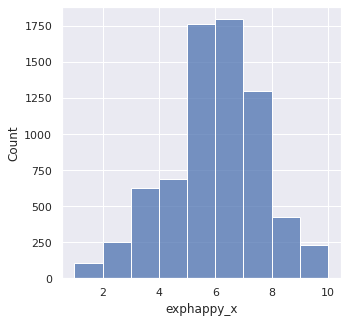

In [73]:
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.histplot(data=df, x="exphappy_x", binwidth = 1)

In [74]:
df.groupby('exphappy_x')['match'].mean().sort_values(ascending = False)

exphappy_x
10    0.243902
6     0.185826
8     0.184834
7     0.171935
9     0.166667
5     0.165435
4     0.153509
2     0.139442
3     0.139200
1     0.128440
Name: match, dtype: float64

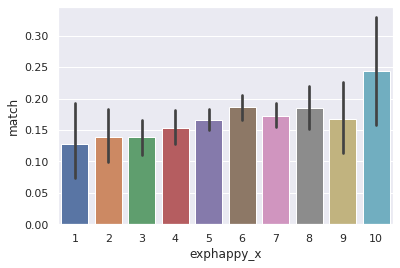

In [75]:
ax = sns.barplot(x="exphappy_x", y="match", data=df)

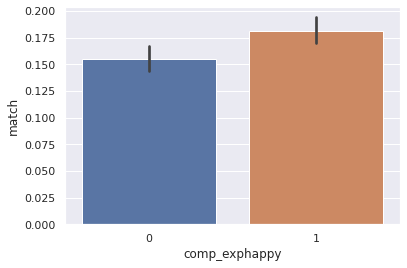

In [76]:
df['comp_exphappy'] = np.where((df['exphappy_x']>=6) & (df['exphappy_y']>=6),1,0)
ax = sns.barplot(x="comp_exphappy", y="match", data=df)

## Normalización

In [70]:
from sklearn.preprocessing import StandardScaler

In [77]:
df_modelo = df.copy()
cols_a_normalizar = pf_x + pf_y + compatibilidades + comp_pref + ['dif_age','dif_age_group','dif_age_gen','comb_race_mejor','comp_date','comp_sale_mucho','goal_x','exphappy_x','comp_exphappy','imprelig','imprace']
df_modelo[cols_a_normalizar] = StandardScaler().fit_transform(df_modelo[cols_a_normalizar])
df_modelo = df_modelo[['match']+cols_a_normalizar]
df_modelo.head()

,match,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,comp_sports,comp_tvsports,comp_exercise,comp_dining,comp_museums,comp_art,comp_hiking,comp_gaming,comp_clubbing,comp_reading,comp_tv,comp_theater,comp_movies,comp_concerts,comp_music,comp_shopping,comp_yoga,attr,sin,int,fun,amb,dif_age,dif_age_group,dif_age_gen,comb_race_mejor,comp_date,comp_sale_mucho,goal_x,exphappy_x,comp_exphappy,imprelig,imprace
30,0,-0.195972,0.367902,-0.041042,0.418735,-0.124,-0.280636,1.008869,0.372058,-0.044318,0.419456,-1.770961,-1.061317,-1.544012,-0.983502,-0.323862,-0.592774,-0.647602,-0.043658,0.315565,0.203414,0.369409,-0.495847,0.564327,1.075302,-0.691814,0.469113,-0.596694,-1.294183,1.37963,0.903921,0.254214,-0.507834,0.813299,-1.588842,0.249408,0.496686,-0.810538,-0.138517,0.197568,-0.22923,-0.792065,-2.646806,-1.044936,-0.952947,-0.988884
31,0,-0.195972,0.367902,-0.041042,0.418735,-0.124,-0.280636,3.005533,-2.483082,-2.958965,3.676097,-1.770961,-1.843382,-1.544012,-0.983502,-0.323862,-0.592774,-0.647602,-0.043658,0.315565,0.203414,0.369409,-0.495847,0.564327,1.075302,-0.691814,0.469113,-0.596694,-1.294183,1.37963,2.741286,-2.279194,-2.780934,4.009145,-1.588842,-0.935817,0.496686,0.389224,-0.138517,0.197568,-0.22923,-0.792065,-2.646806,-1.044936,-0.952947,-0.988884
32,0,-0.195972,0.367902,-0.041042,0.418735,-0.124,-0.280636,-0.268996,0.086544,-0.190050,0.093791,0.540846,0.033573,-1.544012,-0.983502,-0.323862,-0.592774,-0.647602,-0.043658,0.315565,0.203414,0.369409,-0.495847,0.564327,1.075302,-0.691814,0.469113,-0.596694,-1.294183,1.37963,-0.271992,0.000873,-0.621489,0.493714,0.590926,-0.935817,0.496686,0.389224,-0.138517,0.197568,-0.22923,-0.792065,-2.646806,-1.044936,-0.952947,-0.988884
33,1,-0.195972,0.367902,-0.041042,0.418735,-0.124,-0.280636,0.609536,-1.769297,-0.772980,3.676097,-0.945315,-1.061317,-1.544012,-0.983502,-0.323862,-0.592774,-0.647602,-0.043658,0.315565,0.203414,0.369409,-0.495847,0.564327,1.075302,-0.691814,0.469113,-0.596694,-1.294183,1.37963,0.536448,-1.645842,-1.076109,4.009145,-0.810354,-1.330892,0.496686,0.149272,-0.138517,0.197568,-0.22923,-0.792065,-2.646806,-1.044936,-0.952947,-0.988884
34,0,-0.195972,0.367902,-0.041042,0.418735,-0.124,-0.280636,0.609536,-1.055512,-0.044318,-1.208865,-0.119670,1.284876,-1.544012,-0.983502,-0.323862,-0.592774,-0.647602,-0.043658,0.315565,0.203414,0.369409,-0.495847,0.564327,1.075302,-0.691814,0.469113,-0.596694,-1.294183,1.37963,0.536448,-1.012490,-0.507834,-0.784624,-0.031865,-0.935817,0.496686,-0.090681,-0.138517,0.197568,-0.22923,-0.792065,-2.646806,-1.044936,-0.952947,-0.988884


## Split

In [78]:
from sklearn.model_selection import train_test_split

In [101]:
# Separo en train y test
# Let's say we want to split the data in 80:20 for train:valid:test dataset
#train_size=0.6

X = df_modelo.loc[:, df_modelo.columns != 'match'].copy()
y = df_modelo['match']

# In the first step we will split the data in training and remaining dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7)

print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(5019, 45)
(5019,)
(2152, 45)
(2152,)


(None, None)

## Árboles

In [80]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

In [106]:
# me quedo con las compatibilidades que no tienen una alta correlación entre sí
compatibilidades_filtered = ['comp_sports','comp_exercise','comp_dining','comp_art','comp_hiking',
 'comp_gaming','comp_clubbing','comp_reading','comp_tv','comp_movies','comp_concerts','comp_yoga']

variables = comp_pref + compatibilidades_filtered

#'comp_clubbing','comp_yoga','comp_exercise','comp_shopping','comp_concerts','comp_hiking',

#['attr1_1','fun1_1'] + ['comp_clubbing','comp_art','comp_dining','comp_yoga','comp_concerts','comp_hiking','comp_sports'] + comp_pref + ['dif_age_group','comb_race_mejor','comp_sale_mucho','exphappy_x','imprelig','imprace']

#['comp_clubbing','comp_yoga','comp_exercise','comp_shopping','comp_concerts','comp_hiking', 'comp_date','comb_race_mejor','comp_exphappy','goal_x','dif_age_gen','comp_sale_mucho']

In [87]:
df_corr = df[['match']comp_pref].corr('pearson')
df_corr.style.background_gradient(cmap='coolwarm', axis=None)

,match,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr,sin,int,fun,amb
match,1.000000,0.018596,-0.035234,0.010604,0.044189,-0.008707,-0.043395,0.028353,-0.028035,0.007906,0.071769,0.006946
pf_o_att,0.018596,1.000000,-0.435579,-0.342847,-0.199079,-0.486587,-0.461074,0.927492,-0.387703,-0.340491,-0.147603,-0.434325
pf_o_sin,-0.035234,-0.435579,1.000000,-0.123037,-0.154603,-0.005788,0.043438,-0.403686,0.903203,-0.114554,-0.150382,-0.011996
pf_o_int,0.010604,-0.342847,-0.123037,1.000000,-0.139133,-0.050090,-0.085947,-0.326699,-0.118461,0.931260,-0.129428,-0.049422
pf_o_fun,0.044189,-0.199079,-0.154603,-0.139133,1.000000,-0.069964,-0.185703,-0.184656,-0.145116,-0.131413,0.856718,-0.058020
pf_o_amb,-0.008707,-0.486587,-0.005788,-0.050090,-0.069964,1.000000,0.133038,-0.447444,-0.010958,-0.020212,-0.075623,0.894371
pf_o_sha,-0.043395,-0.461074,0.043438,-0.085947,-0.185703,0.133038,1.000000,-0.422279,0.046603,-0.061795,-0.158562,0.125353
attr,0.028353,0.927492,-0.403686,-0.326699,-0.184656,-0.447444,-0.422279,1.000000,-0.340001,-0.288448,-0.072168,-0.364952
sin,-0.028035,-0.387703,0.903203,-0.118461,-0.145116,-0.010958,0.046603,-0.340001,1.000000,-0.080393,-0.105044,0.010568
int,0.007906,-0.340491,-0.114554,0.931260,-0.131413,-0.020212,-0.061795,-0.288448,-0.080393,1.000000,-0.078806,0.021600


In [104]:
X_train=np.array(X_train[variables])
X_test = np.array(X_test[variables])

In [89]:
# for i in range(5,20,2): 
#   print(i)
#   regr2 = ExtraTreesClassifier(max_depth=i)
#   fregr2 = regr2.fit(X_train,y_train)
#   r2_train = fregr2.score(X_train, y_train)
#   r2_test = fregr2.score(X_test, y_test)
#   print(f'max_depth: {i} => r2_train: {r2_train} - r2_test: {r2_test}')

5
max_depth: 5 => r2_train: 0.8304443116158597 - r2_test: 0.8327137546468402
7
max_depth: 7 => r2_train: 0.8332337118947998 - r2_test: 0.8336431226765799
9
max_depth: 9 => r2_train: 0.8410041841004184 - r2_test: 0.8336431226765799
11
max_depth: 11 => r2_train: 0.8595337716676629 - r2_test: 0.8308550185873605
13
max_depth: 13 => r2_train: 0.8965929468021518 - r2_test: 0.8299256505576208
15
max_depth: 15 => r2_train: 0.9350468220761108 - r2_test: 0.8252788104089219
17
max_depth: 17 => r2_train: 0.9808726838015541 - r2_test: 0.8178438661710037
19
max_depth: 19 => r2_train: 0.9970113568439928 - r2_test: 0.8099442379182156


In [117]:
# for i in range(1,30,3):
#   print(i)
#   regr3 = RandomForestClassifier(max_depth=i,random_state=42,n_estimators=100,min_samples_leaf=1,max_features=.1)
#   fregr3 = regr3.fit(X_train,y_train)
#   r2_train = fregr3.score(X_train, y_train)
#   r2_test = fregr3.score(X_test, y_test)
#   print(f'max_depth: {i} => r2_train: {r2_train} - r2_test: {r2_test}')

In [133]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [119]:
etc=ExtraTreesClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100, 150, 200],
    'max_depth' : list(range(1,30,5)),
    'criterion' :['gini', 'entropy'],
    'bootstrap' :[True, False]
}

CV_etc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_etc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 6, 11, 16, 21, 26],
                         'n_estimators': [100, 150, 200]})

In [120]:
CV_etc.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 6,
 'n_estimators': 150}

In [129]:
etc1=ExtraTreesClassifier(random_state=42, max_features='auto', n_estimators= 150, max_depth=6, criterion='entropy')
etc1.fit(X_train, y_train)

pred_etc1 = etc1.predict(X_test)
pred_proba_etc1 = etc1.predict_proba(X_test)[:,1]
 
confusion_matrix = pd.crosstab(y_test,pred_etc1, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,1781,0
1,370,1


In [130]:
etc1.score(X_test, y_test)

0.8280669144981413

In [136]:
roc_auc_score(y_test, pred_proba_etc1)

0.6342744846394481

In [112]:
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100, 150, 200],
    'max_depth' : list(range(1,30,5)),
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 4, 7, 10, 13, 16, 19, 22, 25, 28],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 150, 200]})

In [113]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 150}

In [131]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 150, max_depth=10, criterion='entropy')
rfc1.fit(X_train, y_train)

pred_rfc1 = rfc1.predict(X_test)
pred_proba_rfc1 = rfc1.predict_proba(X_test)[:,1]
 
confusion_matrix = pd.crosstab(y_test,pred_rfc1, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,1774,7
1,363,8


In [132]:
rfc1.score(X_test, y_test)

0.8280669144981413

In [134]:
roc_auc_score(y_test, pred_proba_rfc1)

0.6338560214059457

In [115]:
importances = []

# regr3 = RandomForestClassifier(max_depth=16,random_state=42,n_estimators=100,min_samples_leaf=1,max_features=.1)
# fregr3 = regr3.fit(X_train,y_train)

for i in range(len(variables)):
  importances.append([variables[i], rfc1.feature_importances_[i]])

importances = pd.DataFrame(importances, columns=["feature", "importance"])
importances.sort_values(by='importance',ascending = False)

,feature,importance
1,sin,0.095575
3,fun,0.094086
0,attr,0.093322
4,amb,0.089759
2,int,0.089753
11,comp_clubbing,0.058998
13,comp_tv,0.045360
15,comp_concerts,0.044482
9,comp_hiking,0.043178
6,comp_exercise,0.041603


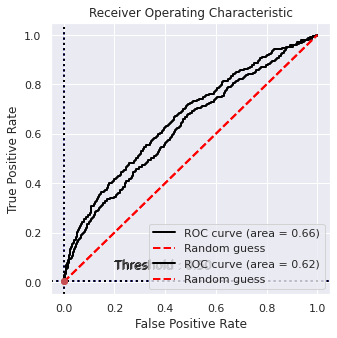

In [320]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc_rf = BinaryClassification(y_test, pred_proba_rf, labels=["Class 1", "Class 2"])
bc_lr = BinaryClassification(y_test, pred_proba_lr, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc_rf.plot_roc_curve(c_thresh_lines='blue')
bc_lr.plot_roc_curve()

plt.show()

## XGboost

In [141]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [144]:
xg_reg = xgb.XGBClassifier()
xg_reg.fit(X_train,y_train)
pred_xg = xg_reg.predict(X_test)
xg_reg.score(X_test, y_test)

0.828996282527881

In [145]:
confusion_matrix = pd.crosstab(y_test,pred_xg, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,1776,5
1,363,8


In [146]:
roc_auc_score(y_test, pred_xg)

0.5093779653757619

## Logistic

In [148]:
from sklearn.linear_model import LogisticRegression

In [158]:
grid={"C":np.logspace(-3,3,7)}# l1 lasso l2 ridge
lr=LogisticRegression()
CV_lr=GridSearchCV(lr,grid,cv=10)
CV_lr.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2']})

In [159]:
CV_lr.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [169]:
lr1 = LogisticRegression(C=0.001)
lr1.fit(X_train, y_train)
pred_lr = lr1.predict(X_test)
pred_proba_lr1 = lr1.predict_proba(X_test)[:,1]

In [170]:
lr1.score(X_test, y_test)

0.8276022304832714

In [171]:
confusion_matrix = pd.crosstab(y_test,pred_lr, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0
Actual,
0,1781
1,371


In [172]:
roc_auc_score(y_test, pred_proba_lr1)

0.5777804346871969